# Informed search

Most codes here are adapted from R&N AIMA

http://aima.cs.berkeley.edu/

* Utilize an extra information about the state with respect to goal.

* Extra information $\sim$ domain-specific hints

* Hints comes in the form of a **heuristic function**, $h(n)$.

> "$h(n)$ : estimated cost of the cheapest path from the state at node $n$ to a goal state."

## Problem 
<a class="anchor" id="Prelude"></a>

It is the world, the environment, or the universe of what we are interested.

### Romania traveling map

<img src="https://github.com/tatpongkatanyukul/AIX/raw/main/pics/F3p1Map.png" alt="Romania" width="600"/>

In [1]:
import SearchAUX1 as m

In [2]:
import importlib
importlib.reload(m)

<module 'SearchAUX1' from '/home/jupyter-tatpong@kku.ac.th/Y2024/STO/SearchAUX1.py'>

In [3]:
#dir()

In [4]:
import inspect

lines = inspect.getsource(m.breadth_first_search)
print(lines)

def breadth_first_search(problem, show=False):
    fringe = FIFOQueue()                    # Set up a FIFO queue
    fringe.append(Node(problem.initial))    # Add the initial state
    search_cost = 0
    if show:
        showfifo(fringe, "queue")

    while not fringe.is_empty():            # Traverse a queue
        node = fringe.pop()                 # Pop the first in queue
        if problem.goal_test(node.state):   # Check if goal is reach
            return node, search_cost        # Yes, return the found
        fringe.extend(node.expand(problem)) # Expand the fringe 
        search_cost += 1  
        if show:
            showfifo(fringe, "queue")        
    return None, search_cost                # There is no solution



# Recall breadth-first search

Searches we have seen so far, inc. breadth-first search and uniform-cost search, are uninformed searches. 

In [5]:
start = "Arad"
goal = "Bucharest"

prob = m.RoutingProblem(m.romania_map, initial=start, goal=goal)
rst, scost = m.breadth_first_search(prob)

soln = rst.path()

route = ""
for s in soln:
    route = s.state + ' - ' + route

route = route[:-3].strip()
print(route)
print('search cost =', scost)

Arad - Sibiu - Fagaras - Bucharest
search cost = 26


In [6]:
rst.__dict__

{'state': 'Bucharest',
 'parent': <SearchAUX1.Node at 0x7f0a024fd900>,
 'action': 'Bucharest',
 'path_cost': 450,
 'depth': 3}

Let's see how it works

In [7]:
rst, scost = m.breadth_first_search(prob, show=True)
print('search cost =', scost)

* queue:[ARAD]
* queue:[a, ZERIND, Sibiu, Timisoara]
* queue:[a, z, SIBIU, Timisoara, Oradea, Arad]
* queue:[a, z, s, TIMISOARA, Oradea, Arad, Rimnicu Vilcea, Arad, Oradea, Fagaras]
* queue:[a, z, s, t, ORADEA, Arad, Rimnicu Vilcea, Arad, Oradea, Fagaras, Lugoj, Arad]
* queue:[a, z, s, t, o, ARAD, Rimnicu Vilcea, Arad, Oradea, Fagaras, Lugoj, Arad, Zerind, Sibiu]
* queue:[a, z, s, t, o, a, RIMNICU VILCEA, Arad, Oradea, Fagaras, Lugoj, Arad, Zerind, Sibiu, Zerind, Sibiu, Timisoara]
* queue:[a, z, s, t, o, a, r, ARAD, Oradea, Fagaras, Lugoj, Arad, Zerind, Sibiu, Zerind, Sibiu, Timisoara, Sibiu, Pitesti, Craiova]
* queue:[a, z, s, t, o, a, r, a, ORADEA, Fagaras, Lugoj, Arad, Zerind, Sibiu, Zerind, Sibiu, Timisoara, Sibiu, Pitesti, Craiova, Zerind, Sibiu, Timisoara]
* queue:[a, z, s, t, o, a, r, a, o, FAGARAS, Lugoj, Arad, Zerind, Sibiu, Zerind, Sibiu, Timisoara, Sibiu, Pitesti, Craiova, Zerind, Sibiu, Timisoara, Zerind, Sibiu]
* queue:[a, z, s, t, o, a, r, a, o, f, LUGOJ, Arad, Zerind, Si

# Memoization

We need not to expand the node visited, since we have done that (sometimes along the way).

In [9]:
def breadth_first_search(problem, show=False):
    fringe = m.FIFOQueue()                    # Set up a FIFO queue
    fringe.append(m.Node(problem.initial))    # Add the initial state
    search_cost = 0
    if show:
        m.showfifo(fringe, "queue")

    reached = {}
    while not fringe.is_empty():            # Traverse a queue
        node = fringe.pop()                 # Pop the first in queue
        if problem.goal_test(node.state):   # Check if goal is reach
            return node, search_cost        # Yes, return the found
        if node.state not in reached:
            reached[node.state] = node
            fringe.extend(node.expand(problem)) # Expand the fringe 
            search_cost += 1  
            if show:
                m.showfifo(fringe, "queue")        
    return None, search_cost                # There is no solution

In [10]:
rst, scost = breadth_first_search(prob, show=True)
print('search cost =', scost)

* queue:[ARAD]
* queue:[a, ZERIND, Sibiu, Timisoara]
* queue:[a, z, SIBIU, Timisoara, Oradea, Arad]
* queue:[a, z, s, TIMISOARA, Oradea, Arad, Rimnicu Vilcea, Arad, Oradea, Fagaras]
* queue:[a, z, s, t, ORADEA, Arad, Rimnicu Vilcea, Arad, Oradea, Fagaras, Lugoj, Arad]
* queue:[a, z, s, t, o, ARAD, Rimnicu Vilcea, Arad, Oradea, Fagaras, Lugoj, Arad, Zerind, Sibiu]
* queue:[a, z, s, t, o, a, r, ARAD, Oradea, Fagaras, Lugoj, Arad, Zerind, Sibiu, Sibiu, Pitesti, Craiova]
* queue:[a, z, s, t, o, a, r, a, o, f, LUGOJ, Arad, Zerind, Sibiu, Sibiu, Pitesti, Craiova, Sibiu, Bucharest]
* queue:[a, z, s, t, o, a, r, a, o, f, l, ARAD, Zerind, Sibiu, Sibiu, Pitesti, Craiova, Sibiu, Bucharest, Timisoara, Mehadia]
* queue:[a, z, s, t, o, a, r, a, o, f, l, a, z, s, s, p, CRAIOVA, Sibiu, Bucharest, Timisoara, Mehadia, Rimnicu Vilcea, Craiova, Bucharest]
* queue:[a, z, s, t, o, a, r, a, o, f, l, a, z, s, s, p, c, SIBIU, Bucharest, Timisoara, Mehadia, Rimnicu Vilcea, Craiova, Bucharest, Drobeta, Rimnicu V

# Prelude to informed search

Let's try starting from Bucharest and back to Arad

In [11]:
prob = m.RoutingProblem(m.romania_map, initial="Bucharest", goal="Arad")
rst, scost = breadth_first_search(prob, show=True)
print('search cost =', scost)

* queue:[BUCHAREST]
* queue:[b, URZICENI, Pitesti, Giurgiu, Fagaras]
* queue:[b, u, PITESTI, Giurgiu, Fagaras, Vaslui, Bucharest, Hirsova]
* queue:[b, u, p, GIURGIU, Fagaras, Vaslui, Bucharest, Hirsova, Rimnicu Vilcea, Craiova, Bucharest]
* queue:[b, u, p, g, FAGARAS, Vaslui, Bucharest, Hirsova, Rimnicu Vilcea, Craiova, Bucharest, Bucharest]
* queue:[b, u, p, g, f, VASLUI, Bucharest, Hirsova, Rimnicu Vilcea, Craiova, Bucharest, Bucharest, Sibiu, Bucharest]
* queue:[b, u, p, g, f, v, BUCHAREST, Hirsova, Rimnicu Vilcea, Craiova, Bucharest, Bucharest, Sibiu, Bucharest, Iasi, Urziceni]
* queue:[b, u, p, g, f, v, b, h, RIMNICU VILCEA, Craiova, Bucharest, Bucharest, Sibiu, Bucharest, Iasi, Urziceni, Urziceni, Eforie]
* queue:[b, u, p, g, f, v, b, h, r, CRAIOVA, Bucharest, Bucharest, Sibiu, Bucharest, Iasi, Urziceni, Urziceni, Eforie, Sibiu, Pitesti, Craiova]
* queue:[b, u, p, g, f, v, b, h, r, c, BUCHAREST, Bucharest, Sibiu, Bucharest, Iasi, Urziceni, Urziceni, Eforie, Sibiu, Pitesti, Craiov

How about recalling the map?

<img src="https://github.com/tatpongkatanyukul/AIX/raw/main/pics/F3p1Map.png" alt="Romania" width="600"/>

We search into every possible option, regardless of the direct toward our goal.

# Informed Search

Suppose we use the straight-line distance as hints to guide us.

In [12]:
lines = inspect.getsource(prob.h)
print(lines)

    def h(self, state):
        cx, cy = self.map["location"][state]
        gx, gy = self.map["location"][self.goal]

        # Squared Euclidean distance
        return math.sqrt( (cx - gx)**2 + (cy - gy)**2 )



In [13]:
lines = inspect.getsource(m.best_first_search)
print(lines)

def best_first_search(problem, f, show=False):
    fringe = PriorityQueue(min, f)                              # Set up a queue by f of node
    fringe.append(Node(problem.initial))                        # Add the initial state
    search_cost = 0
    if show:
        showq(fringe, "queue")

    reached = {}                                                # A record of states reached
    while not fringe.is_empty():                                # Traverse a queue
        node = fringe.pop()                                     # Pop the first in queue
        if problem.goal_test(node.state):                       # Check if goal is reach
            return node, search_cost                            # Yes, return the found
        if (node.state not in reached) or (node.path_cost < reached[node.state].path_cost):    
                                                                # Check if it's a new node or an old one with a better path     
            reached[node.state] = node 

# Greedy Best-First Search

In [14]:
from random import seed
from random import random

# (Almost) Equivalent to breadth-first search
# def fee(node):
#     return node.depth + 0.01*ord(node.state[0]) + 0.001*random()


# Greedy best-first search using heuristic function
def fee(node):
    return prob.h(node.state)


prob = m.RoutingProblem(m.romania_map, initial="Bucharest", goal="Arad")
rst, scost = m.best_first_search(prob, fee, show=True)

soln = rst.path()

route = ""
for s in soln:
    route = s.state + ' - ' + route

route = route[:-3].strip()
print(route)  
print('search cost =', scost)
print('path cost =', rst.path_cost)

* queue:[(350.294,Bucharest)]
* queue:[(218.277,Fagaras) (260.417,Pitesti) (360.472,Giurgiu) (391.649,Urziceni)]
* queue:[(121.165,Sibiu) (260.417,Pitesti) (350.294,Bucharest) (360.472,Giurgiu) (391.649,Urziceni)]
* queue:[(0.000,Arad) (88.549,Oradea) (163.976,Rimnicu Vilcea) (218.277,Fagaras) (260.417,Pitesti) (350.294,Bucharest) (360.472,Giurgiu) (391.649,Urziceni)]
Bucharest - Fagaras - Sibiu - Arad
search cost = 3
path cost = 450


# A* 

<a class="anchor" id="Astar"></a>

Heuristic: fee (for search priority) is sum of cost to node and the node heuristic.

$$f(n) = g(n) + h(n)$$

In [10]:
from SearchAUX1 import PriorityQueue, Node, showq, infinity

In [11]:
def Astar(problem, show=False):

    def fee(node):
        return node.path_cost + prob.h(node.state)

    fringe = PriorityQueue(min, fee)                            # Set up a queue by f of node
    fringe.append(Node(problem.initial))                        # Add the initial state
    search_cost = 0
    if show:
        showq(fringe, "queue")

    reached = {}                                                # A record of states reached
    while not fringe.is_empty():                                # Traverse a queue
        node = fringe.pop()                                     # Pop the first in queue
        if problem.goal_test(node.state):                       # Check if goal is reach
            return node, search_cost                            # Yes, return the found
        if (node.state not in reached) :    
                                                                # Check if it's a new node or an old one with a better path     
            reached[node.state] = node                          # Track new reached (or better reached)
            fringe.extend(node.expand(problem))                 # Expand the fringe 
            search_cost += 1
            if show:
                showq(fringe, "queue")

    return None, search_cost                                     # There is no solution

In [12]:
start = 'Arad'
goal = 'Bucharest'
disp=True

prob = m.RoutingProblem(m.romania_map, initial=start, goal=goal)
rst, scost = Astar(prob, show=disp)

soln = rst.path()

route = ""
for s in soln:
    route = s.state + ' - ' + route

route = route[:-3].strip()
print(route)  
print('search cost =', scost)
print('path cost =', rst.path_cost)

* queue:[(350.294,Arad)]
* queue:[(372.699,Sibiu) (431.202,Zerind) (435.057,Timisoara)]
* queue:[(393.625,Fagaras) (406.489,Rimnicu Vilcea) (431.202,Zerind) (435.057,Timisoara) (630.294,Arad) (654.176,Oradea)]
* queue:[(406.489,Rimnicu Vilcea) (431.202,Zerind) (435.057,Timisoara) (450.000,Bucharest) (570.699,Sibiu) (630.294,Arad) (654.176,Oradea)]
* queue:[(406.894,Pitesti) (431.202,Zerind) (435.057,Timisoara) (450.000,Bucharest) (518.086,Craiova) (532.699,Sibiu) (570.699,Sibiu) (630.294,Arad) (654.176,Oradea)]
* queue:[(418.000,Bucharest) (431.202,Zerind) (435.057,Timisoara) (450.000,Bucharest) (518.086,Craiova) (532.699,Sibiu) (570.699,Sibiu) (600.489,Rimnicu Vilcea) (607.086,Craiova) (630.294,Arad) (654.176,Oradea)]
Arad - Sibiu - Rimnicu Vilcea - Pitesti - Bucharest
search cost = 5
path cost = 418


## C.f. uniform-cost search

In [13]:
def fee(node):
    return node.path_cost

prob = m.RoutingProblem(m.romania_map, initial="Arad", goal="Bucharest")

rst2, scost2 = m.best_first_search(prob, fee, show=False)

for t in rst2.path()[::-1]:
    print(t.state, end='; ')

print()
print('search cost =', scost2)
print('path cost =', rst2.path_cost)

Arad; Sibiu; Rimnicu Vilcea; Pitesti; Bucharest; 
search cost = 12
path cost = 418


Notice that A* cuts down the search cost significantly.

# Investigation into A*

In [19]:
############
# Problem
############

class TopoRoutingProblem:
    "The problem of searching a graph from one node to another."
    def __init__(self, topology, initial, goal):
        self.topo = topology
        self.initial = initial
        self.goal = goal

    def successor(self, s):
        """
        Take s: current state/current town
        Return a list of (action, result/linked town) pairs.
        """
        return [(snext, snext) for snext in self.topo['transit'][s].keys()]

    def path_cost(self, cost_to_s, s, action, snext):

        transit_cost = infinity
        if s in self.topo["transit"]:
            if snext in self.topo["transit"][s]:
                transit_cost = self.topo["transit"][s][snext]

        return cost_to_s + transit_cost

    def goal_test(self, state):
        return state == self.goal

    def h(self, state):
        return self.topo["hint"][state][self.goal]

![Counter-Example A* Optimality](https://github.com/tatpongkatanyukul/AIX/raw/main/AstarAdmissibility.png)

In [20]:
# Data

topo1 = {'transit': {'S': {'A': 1, 'B': 1}, 'A': {'C': 1}, 'B': {'C': 2}, 'C': {'G': 10}},
         'hint' : {'S': {'A': 0, 'B': 0, 'C': 0, 'G': 0}, 'A': {'C': 1, 'G': 10}, 'B': {'C': 2, 'G': 2}, 'C': {'G': 5}, 'G': {'G': 0}}}

In [21]:
# Test

prob = TopoRoutingProblem(topo1, 'S', 'G')
print(prob.successor('S'))
print(prob.successor('A'))
print(prob.successor('B'))
print(prob.path_cost(10, 'S', 'A', 'A',))
print(prob.path_cost(10, 'S', 'B', 'B',))
print(prob.path_cost(10, 'A', 'C', 'C',))
print(prob.path_cost(10, 'B', 'C', 'C',))
print(prob.path_cost(10, 'C', 'G', 'G',))
print(prob.goal_test('A'))
print(prob.goal_test('B'))
print(prob.goal_test('C'))
print(prob.h('G'))
print(prob.h('A'))
print(prob.h('B'))
print(prob.h('C'))
print(prob.h('G'))


[('A', 'A'), ('B', 'B')]
[('C', 'C')]
[('C', 'C')]
11
11
11
12
20
False
False
False
0
10
2
5
0


In [44]:
start = 'S'
goal = 'G'
disp=True

prob = TopoRoutingProblem(topo1, 'S', 'G')
rst, scost = Astar(prob, show=disp)

soln = rst.path()

route = ""
for s in soln:
    route = s.state + ' - ' + route

route = route[:-3].strip()
print(route)  
print('search cost =', scost)
print('path cost =', rst.path_cost)

* queue:[(0.000,S)]
* queue:[(3.000,B) (11.000,A)]
* queue:[(8.000,C) (11.000,A)]
* queue:[(11.000,A) (13.000,G)]
* queue:[(7.000,C) (13.000,G)]
S - B - C - G
search cost = 4
path cost = 13


Try add criterion ```(node.path_cost < reached[node.state].path_cost)``` from A* 

# Improved A*

In [45]:
def Astar(problem, show=False):

    def fee(node):
        return node.path_cost + prob.h(node.state)

    fringe = PriorityQueue(min, fee)                            # Set up a queue by f of node
    fringe.append(Node(problem.initial))                        # Add the initial state
    search_cost = 0
    if show:
        showq(fringe, "queue")

    reached = {}                                                # A record of states reached
    while not fringe.is_empty():                                # Traverse a queue
        node = fringe.pop()                                     # Pop the first in queue
        if problem.goal_test(node.state):                       # Check if goal is reach
            return node, search_cost                            # Yes, return the found
        if (node.state not in reached) or \
           (node.path_cost < reached[node.state].path_cost):    
                                                                # Check if it's a new node or an old one with a better path     
            reached[node.state] = node                          # Track new reached (or better reached)
            fringe.extend(node.expand(problem))                 # Expand the fringe 
            search_cost += 1
            if show:
                showq(fringe, "queue")

    return None, search_cost                                     # There is no solution

In [46]:
start = 'S'
goal = 'G'
disp=True

prob = TopoRoutingProblem(topo1, 'S', 'G')
rst, scost = Astar(prob, show=disp)

soln = rst.path()

route = ""
for s in soln:
    route = s.state + ' - ' + route

route = route[:-3].strip()
print(route)  
print('search cost =', scost)
print('path cost =', rst.path_cost)

* queue:[(0.000,S)]
* queue:[(3.000,B) (11.000,A)]
* queue:[(8.000,C) (11.000,A)]
* queue:[(11.000,A) (13.000,G)]
* queue:[(7.000,C) (13.000,G)]
* queue:[(12.000,G) (13.000,G)]
S - A - C - G
search cost = 5
path cost = 12


## Discussion

Both routes (```S - B - C - G``` and ```S - A - C - G```) go through ```C```, 
but heuristic of ```B``` is much more optimistic than one of ```A```.
Therefore, ```B``` will get explored before ```A``` 
and ```C``` (thru ```B```) will get into the ```reached``` list.

Without check for the path costs, ```C``` thru ```A``` will not be explored
and a route thru ```A``` won't have a chance.

# Appendices

## Astar with re-use BFS

In [47]:
lines = inspect.getsource(m.best_first_search)
print(lines)

def best_first_search(problem, f, show=False):
    fringe = PriorityQueue(min, f)                              # Set up a queue by f of node
    fringe.append(Node(problem.initial))                        # Add the initial state
    search_cost = 0
    if show:
        showq(fringe, "queue")

    reached = {}                                                # A record of states reached
    while not fringe.is_empty():                                # Traverse a queue
        node = fringe.pop()                                     # Pop the first in queue
        if problem.goal_test(node.state):                       # Check if goal is reach
            return node, search_cost                            # Yes, return the found
        if (node.state not in reached) or (node.path_cost < reached[node.state].path_cost):    
                                                                # Check if it's a new node or an old one with a better path     
            reached[node.state] = node 

In [48]:
start = 'Arad'
goal = 'Bucharest'
disp=True

def fee(node):
    return node.path_cost + prob.h(node.state)


prob = m.RoutingProblem(m.romania_map, initial=start, goal=goal)
rst, scost = m.best_first_search(prob, fee, show=disp)

soln = rst.path()

route = ""
for s in soln:
    route = s.state + ' - ' + route

route = route[:-3].strip()
print(route)  
print('search cost =', scost)
print('path cost =', rst.path_cost)

* queue:[(350.294,Arad)]
* queue:[(372.699,Sibiu) (431.202,Zerind) (435.057,Timisoara)]
* queue:[(393.625,Fagaras) (406.489,Rimnicu Vilcea) (431.202,Zerind) (435.057,Timisoara) (630.294,Arad) (654.176,Oradea)]
* queue:[(406.489,Rimnicu Vilcea) (431.202,Zerind) (435.057,Timisoara) (450.000,Bucharest) (570.699,Sibiu) (630.294,Arad) (654.176,Oradea)]
* queue:[(406.894,Pitesti) (431.202,Zerind) (435.057,Timisoara) (450.000,Bucharest) (518.086,Craiova) (532.699,Sibiu) (570.699,Sibiu) (630.294,Arad) (654.176,Oradea)]
* queue:[(418.000,Bucharest) (431.202,Zerind) (435.057,Timisoara) (450.000,Bucharest) (518.086,Craiova) (532.699,Sibiu) (570.699,Sibiu) (600.489,Rimnicu Vilcea) (607.086,Craiova) (630.294,Arad) (654.176,Oradea)]
Arad - Sibiu - Rimnicu Vilcea - Pitesti - Bucharest
search cost = 5
path cost = 418


In [49]:
start = 'S'
goal = 'G'
disp=True

prob = TopoRoutingProblem(topo1, 'S', 'G')
rst, scost = m.best_first_search(prob, fee, show=disp)

soln = rst.path()

route = ""
for s in soln:
    route = s.state + ' - ' + route

route = route[:-3].strip()
print(route)  
print('search cost =', scost)
print('path cost =', rst.path_cost)

* queue:[(0.000,S)]
* queue:[(3.000,B) (11.000,A)]
* queue:[(8.000,C) (11.000,A)]
* queue:[(11.000,A) (13.000,G)]
* queue:[(7.000,C) (13.000,G)]
* queue:[(12.000,G) (13.000,G)]
S - A - C - G
search cost = 5
path cost = 12


## Optimality

A* is cost-optimal when heuristic $h(n)$ is **admissible**.

> An admissible heuristic is one the never overestimates the cost to reach a goal.

* I.e., $h(n) \leq c(n, g)$ where $c(n, g)$ is a cost to reach a goal.
* Hence, heuristic of the goal is zero, $h(g) = 0$.

*Proof by contradiction*:

* Suppose $C^\ast$ be the cost of the optimal path and A* found a path $C > C^\ast$.


  (A* found a sub-optimal path.)

* There must be some node $n$, which is on the optimal path but left unexpanded,
  because if all the nodes on the optimal path had been expanded, then we would have found the optimal path.


* Let $g^\ast(n)$ be the cost of the optimal path from the start to node $n$

  and $h^\ast(n)$ be the cost of the optimal path from $n$ to the goal.

Then

* (1) $f(n) > C^\ast$ 

  Fee is too large, so that $n$ has not been expanded for others have smaller.
  But, no matter how small (optimistic) the other heuristics are, the true costs would be realized when they were expanded. Their true costs cannot be lower than $C^\ast$. (Otherwise, $C^\ast$ would not be an optimal cost)

  If fee is smaller than $C^\ast$, $n$ would not be left out. It would get higher priority in the queue.

* (2) $f(n) = g(n) + h(n)$

  This is by definition of A*

* (3) $f(n) = g^\ast(n) + h(n)$

  Because $n$ is on the optimal path.

* (4) $f(n) \leq g^\ast(n) + h^\ast(n)$

   Because of admissibility: $h(n) \leq h^\ast(n)$

* (5) $f(n) \leq C^\ast$

   Because by definition $C^\ast = g^\ast(n) + h^\ast(n)$

Therefore (5) contradicts (1). That is, supposition that A* with admissibility heuristic could return a suboptimal path must be wrong.

Another word

> Proof by contradiction: (1) lay the facts; (2) make the statement false; (3) progress logic from fact back to the statement;
(4) if the statement does not match the false statement, we have found the contradiction $\Rightarrow$ statement has to be true.


> **Fact**:
> * Admissible heuristic of any node, $h(n) \leq c(n, g)$
>   * Consequence: $h(g) = 0$
> * A* have queue prioritized by minimal fee, where $\mbox{fee}(n) = \mbox{path-cost}(n) + h(n)$
>
> **Statement** to prove: "A* with admissible $h$ gives optimal path."
>   * $C = C^\ast$, where $C$ is a cost-path found and $C^\ast$ is the optimal cost-path.
>
> Then, **hypothesized statement**: "There is an occasion that path (found by A* with admissible $h$) is not optimal."
>   * $C > C^\ast$.

> If admissible A* path is not optimal, there must be at least one node that is on the optimal path, but not in the found path.
>   * Let $n$ be the node on the optimal path that A* missed.


> **First line of logics**
> * $\mbox{fee}(n) = \mbox{path-cost}(n) + h(n)$ for A*
> * $\mbox{fee}(n) = g^\ast(n) + h(n)$
>   * where $g^\ast(n)$ is optimal path-cost to $n$ if $n$ is on the optimal path.
> * $h(n) \leq h^\ast(n)$ for admissibility,
>   *  where $h^\ast(n)$ true cost from $n$ to $g$.
> * $\mbox{fee}(n) \leq g^\ast(n) + h^\ast(n)$
> * $\mbox{fee}(n) \leq C^\ast$

>
>   | Situation | Path |
>   |-----------|------|
>   | Optimal path | ```... m - n  - ... - g``` |
>   | Found path   | ```... m - n' - ... - g``` |

> Let's consider the moment from node ```m```.
> | Action | Comments |
> |--------|----------|
> |```node = fringe.pop()```| ```m <- Q``` |
> |```if problem.goal_test```| ```m``` is not goal |
> |```node.expand```| ```Q <- n, n'``` |
> |         | fee(n') < fee(n), otherwise n will get pop next |
> |         | ```Q = [n', n]``` |
> |```node = fringe.pop()```| ```n' <- Q``` |
> |```if problem.goal_test```| ```n'``` is not goal |
> |```node.expand```| ```Q <- o'``` |
> |         | Let ```o'``` be a child of ```n'``` |
> |         | fee(o') < fee(n), otherwise n will get pop next |
> |         | ```...``` |
> |         | Things will keep going till the goal state ```g``` |
> |```node.expand```| ```Q <- g``` |
> |         | fee(g) = path-cost(g) + h(g) |
> |         | h(g) = 0 (goal state)          |
> |         | fee(g) = path-cost(g) $=C(g)$     |
> |         | fee(g) < fee(n), otherwise n will get pop next |
 

> * If $\mathrm{fee}(g) < \mathrm{fee}(n)$, then
> * $C(g) < \mathrm{fee}(n)$
> Recall that admissibility $\mathrm{fee}(n)$

> Hence
> * $\mathrm{fee}(n) > C$ , otherwise $n$ will be prioritized before $g$.
> * Recall that with admissible A*: $\mathrm{fee}(n) \leq C^\ast$
> * Hence, $C < \mathrm{fee}(n) \leq C^\ast$
> * I.e., $C < C^\ast$
>   * Contradiction to $C > C^\ast$ (in the hypothesized statement)!
>   * So, the hypothesized statement is FALSE.
>   * Then, the statement $C = C^\ast$ is TRUE.
>   * A* with admissible heuristic gives the optimal result.

### Consistency

> A heuristic $h(n)$ is consistent if, for every node $n$ and every successor $n'$ of $n$ generated by an action $a$, we have:
>
> $$h(n) \leq c(n, a, n') + h(n')$$

* Every consistent heuristic is admissible (but not vice versa)

  * Proof: given $h$ is consistent, i.e., $h(n) \leq c(n, n') + h(n')$,
    * suppose $n'$ is the goal, then $h(n) \leq c(n, g)$ $\Rightarrow h(n) \leq h^\ast(n)$. Admissible!
    * suppose $n'$ is toward to the goal: $h(n') \leq c(n', g) + 0$ $\Rightarrow h(n') \leq h^\ast(n')$
      * Then $c(n, n') + h(n') \leq c(n, n') + h^\ast(n')$ $\Rightarrow h(n) \leq h^\ast(n)$. Admissible!
    * and recall that $h(n) \leq c(n, n') + h(n')$ for every successor $n'$.
      * So, if one of them goes to the goal, then that $c(n, n') + h(n')$ becomes $h^\ast(n)$. 

While consistency would help A* to be very efficient,
it is false to prove its perfect efficiency, as follows.

> If $h$ is consistent, then $h(A) \leq h(B)$ means $h^\ast(A) \leq h^\ast(B)$.

If this is true, A* can be run with the perfect efficiency. Heuristic would guide the search into the right direction at once.

While this may largely hold, there is caveat. Let's follow the proof.

> Given
>
> (1) $h(A) \leq h(B)$ and suppose there is node $n'$ down the paths from A and from B,
> then we have
>
> (2) $c(A, n') + h(n') \leq c(B, n') + h(n')$. ~~"by definition"~~ (No! it's not!)
>
> Thus,
>
> (3) $c(A, n') \leq c(B, n')$ $\Rightarrow h^\ast(A) \leq h^\ast(B)$ 

The flaw is that this infers 
$c(A, n') + h(n') \leq c(B, n') < h(n')$
from 
* $h(A) \leq h(B)$
* $h(A) \leq c(A, n') + h(n')$ by definition
* $h(B) \leq c(B, n') + h(n')$ by definition

We can see that RHS's of both last two expressions have no upper bound.

That means it can be:

* $h(A) \leq c(A, n') + h(n') \leq h(B) \leq c(B, n') + h(n')$

or

* $h(A)  \leq h(B) \leq c(A, n') + h(n') \leq c(B, n') + h(n')$

or

* $h(A)  \leq h(B) \leq c(B, n') + h(n') \leq c(A, n') + h(n')$


The last case happens when $h(A)$ is way too optimistic.



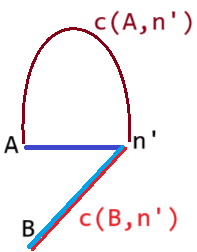

In the picture, heuristic of A may be smaller than one of B,
but the real cost of A, $c(A,n')$ can be much larger than $c(B,n')$.

Consistency does not limit how optimistic heuristic can be.
In addition, while _consistency criterion_ may ensure consistency along the path (fee gets more realistic and less optimistic along the line), but it cannot guarantee consistency across different paths.

**Recap**

* Admissibility infers A* solution is optimal.
* Consistency infers admissibility, but not vice versa.
* Consistency infers efficient search, but not that perfect efficiency.